In [1]:
import numpy as np
import pandas as pd
import os
train_labels = pd.read_csv("D:/phase1/ML/data/trainLabels.csv")
train_labels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [2]:
listing = os.listdir("D:/phase1/ML/data")
listing.remove("trainLabels.csv")
np.size(listing)

10

In [3]:
from PIL import Image

img_rows, img_cols = 200, 200

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("D:/phase1/ML/data/"+file)
    filename = os.path.splitext(base)[0]
    imlabel.append(train_labels.loc[train_labels.image==filename, 'level'].values[0])
    im = Image.open("D:/phase1/ML/data/" + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    immatrix.append(np.array(gray).flatten())

In [4]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

In [5]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

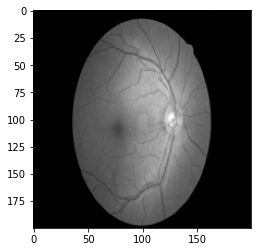

In [6]:
import matplotlib.pyplot as plt
import matplotlib

img=immatrix[9].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

(2592, 3888, 3)


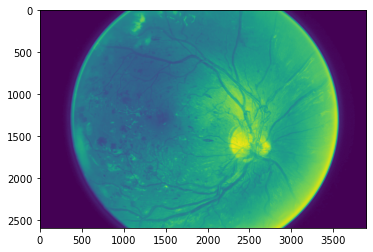

In [8]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('D:/phase1/ML/data/16_left.jpeg',cv2.IMREAD_UNCHANGED)
print(src.shape)

green_channel = src[:,:,1]

cv2.imwrite('D:/phase1/ML/data/16_left_green.jpeg',green_channel)

plt.imshow(green_channel)